In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns


In [4]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')



[]

In [5]:
heart_data = pd.read_csv('D:\Data\Heart Disease/Heart_Disease.csv')
heart_data = heart_data.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'resting_electrocardiogram', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

In [6]:
heart_data

,Index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heart_data.columns

Index(['Index', 'age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [8]:
data_numplots = ['age','cholesterol', 'resting_blood_pressure','st_depression','max_heart_rate_achieved','target']
heart_data[data_numplots].corr()

,age,cholesterol,resting_blood_pressure,st_depression,max_heart_rate_achieved,target
age,1.000000,0.213678,0.279351,0.210013,-0.398522,-0.225439
cholesterol,0.213678,1.000000,0.123174,0.053952,-0.009940,-0.085239
resting_blood_pressure,0.279351,0.123174,1.000000,0.193216,-0.046698,-0.144931
st_depression,0.210013,0.053952,0.193216,1.000000,-0.344187,-0.430696
max_heart_rate_achieved,-0.398522,-0.009940,-0.046698,-0.344187,1.000000,0.421741
target,-0.225439,-0.085239,-0.144931,-0.430696,0.421741,1.000000


# EDA (Exploratory Data Analysis)

In [9]:
data_numplots = ['age','cholesterol', 'resting_blood_pressure','st_depression','max_heart_rate_achieved','target']
heart_data[data_numplots].corr()

,age,cholesterol,resting_blood_pressure,st_depression,max_heart_rate_achieved,target
age,1.000000,0.213678,0.279351,0.210013,-0.398522,-0.225439
cholesterol,0.213678,1.000000,0.123174,0.053952,-0.009940,-0.085239
resting_blood_pressure,0.279351,0.123174,1.000000,0.193216,-0.046698,-0.144931
st_depression,0.210013,0.053952,0.193216,1.000000,-0.344187,-0.430696
max_heart_rate_achieved,-0.398522,-0.009940,-0.046698,-0.344187,1.000000,0.421741
target,-0.225439,-0.085239,-0.144931,-0.430696,0.421741,1.000000


[0.50034405 0.03472465 0.04326763 0.09265481 0.03136723 0.03026563
 0.00991675 0.02354953 0.04217388 0.08831425 0.05643263 0.04698895]


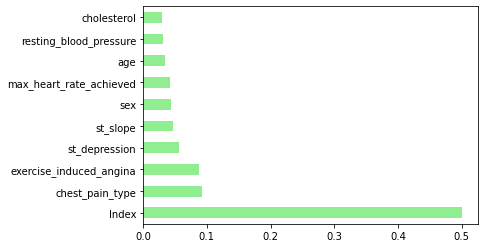

In [10]:
X = heart_data.iloc[:,0:12]  
y = heart_data.iloc[:,-1]    
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X.columns)
feature_cols.nlargest(10).plot(kind='barh', color = 'lightgreen')
plt.show()

In [11]:
heart_data.corr()

,Index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
Index,1.000000,0.185153,0.201132,-0.399163,0.108507,0.020258,0.000743,-0.021130,-0.404972,0.363788,0.298161,-0.276484,0.384962,0.257403,-0.862585
age,0.185153,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,0.201132,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.399163,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.108507,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.020258,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.000743,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_electrocardiogram,-0.021130,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.404972,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.363788,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757


In [12]:
num_data = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','target']
cat_data = heart_data.drop(['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression'],axis = 1)
num_heart_data = heart_data[num_data]
num_heart_data

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


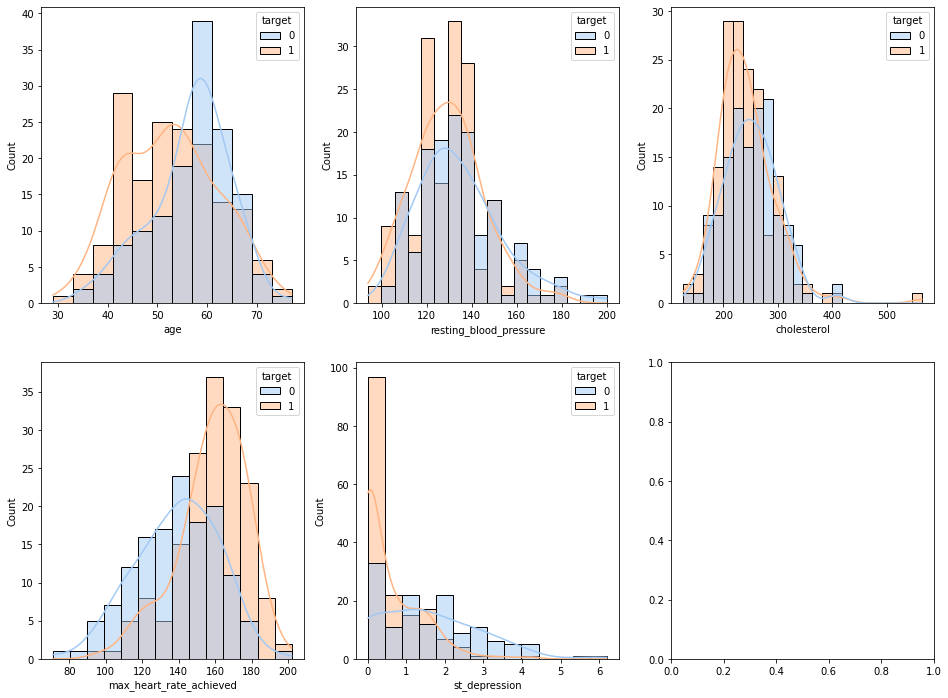

In [13]:
feature_cols = num_heart_data.columns
sns.set_palette("pastel")
fig, axs = plt.subplots(2, 3, figsize = (16, 12))
i = 0
for row in range(2):
    for col in range(3):
        if i <= 4:
            ax = axs[row, col]
            sns.histplot(data=num_heart_data, x = feature_cols[i], hue = 'target', kde = True, ax = ax, color = "Red")
            i += 1
        else:
            break
    
plt.show()

In [14]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      303 non-null    int64  
 1   age                        303 non-null    int64  
 2   sex                        303 non-null    int64  
 3   chest_pain_type            303 non-null    int64  
 4   resting_blood_pressure     303 non-null    int64  
 5   cholesterol                303 non-null    int64  
 6   fasting_blood_sugar        303 non-null    int64  
 7   resting_electrocardiogram  303 non-null    int64  
 8   max_heart_rate_achieved    303 non-null    int64  
 9   exercise_induced_angina    303 non-null    int64  
 10  st_depression              303 non-null    float64
 11  st_slope                   303 non-null    int64  
 12  num_major_vessels          303 non-null    int64  
 13  thalassemia                303 non-null    int64  

# Modelling

In [15]:
y = heart_data["target"]
X = heart_data.drop(['target','fasting_blood_sugar','resting_electrocardiogram'],axis=1)

In [16]:
X.head(5)


,Index,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,1,63,1,3,145,233,150,0,2.3,0,0,1
1,2,37,1,2,130,250,187,0,3.5,0,0,2
2,3,41,0,1,130,204,172,0,1.4,2,0,2
3,4,56,1,1,120,236,178,0,0.8,2,0,2
4,5,57,0,0,120,354,163,1,0.6,2,0,2


In [17]:
import tensorflow as tf
np.random.seed(0)


X_data, y_data = X, y
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=24)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Accuracy measures

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
import numpy as np
def pocid(actual, pred):
    """Prediction on change of direction"""
    nobs = len(pred)
    val=0
    for i in range (nobs-1):
        if (actual[i+1]-actual[i])*(pred[i+1]-pred[i])>0:
            val=val+1
    
    val=val/(nobs-1)
    return 100 * val

# MLP

i can add in the below code the loss of binary_crossentropy ( model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


physical_devises = tf.config.list_physical_devices('GPU')
model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(15))
#model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
print (X_test.shape[1])
print(model.summary())

12
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
mlp = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 47ms/step - loss: 2.0497 - accuracy: 0.7635 - val_loss: 392.5881 - val_accuracy: 0.2969
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4896 - accuracy: 0.6824 - val_loss: 1077.3417 - val_accuracy: 0.4062
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1651 - accuracy: 0.6622 - val_loss: 1863.0798 - val_accuracy: 0.4375
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1388 - accuracy: 0.6486 - val_loss: 2411.2102 - val_accuracy: 0.4531
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9615 - accuracy: 0.6959 - val_loss: 2616.4329 - val_accuracy: 0.4531
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0625 - accuracy: 0.6216 - val_loss: 2731.1289 - val_accuracy: 0.4531
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9582 - accuracy: 0.6419 - val_loss: 2568.3542 - val_accuracy: 0.4531
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 0.1304 - accuracy: 0.8514 - val_loss: 2319.7524 - val_accuracy: 0.4531
Epoch 59/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.8716 - val_loss: 2296.1782 - val_accuracy: 0.4531
Epoch 60/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0949 - accuracy: 0.8851 - val_loss: 2241.1890 - val_accuracy: 0.4531
Epoch 61/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9122 - val_loss: 2138.7769 - val_accuracy: 0.4531
Epoch 62/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1005 - accuracy: 0.9054 - val_loss: 2113.2219 - val_accuracy: 0.4531
Epoch 63/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0913 - accuracy: 0.9257 - val_loss: 2098.0615 - val_accuracy: 0.4531
Epoch 64/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1036 - accuracy: 0.8919 - val_loss: 2173.1387 - val_accuracy: 0.4531
Epoch 65/100

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
mlp_predicted = model.predict(X_test)
d= np.round(abs(mlp_predicted))
d =d.astype('int64')
mlp_acc_score = accuracy_score(y_test, d)
print(f"Accuracy MLP : {mlp_acc_score*100}%")

Accuracy MLP : 93.4065934065934%


In [23]:
mlp_predicted_reshape = mlp_predicted.flatten()
mlp_predicted_reshape = mlp_predicted_reshape.round().astype(int)
mlp_predicted_reshape

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1])

In [24]:
y_test_arr = np.array(y_test)

In [25]:
POCID_MLP= pocid(y_test_arr ,mlp_predicted_reshape)
POCID_MLP

47.77777777777778

In [26]:
mlp_predicted_reshape = mlp_predicted.round() 
mlp_f1_score=f1_score(y_test, mlp_predicted_reshape)
mlp_f1_score

0.94

In [27]:
mlp_mape = mean_absolute_error(y_test, mlp_predicted)
mlp_mape

0.21456917227952035

# CNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_absolute_error

model = Sequential()
model.add(Conv1D(filters=32, activation='relu', kernel_size=2, input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dropout(0.05))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
print(X_train.shape[1])
print(model.summary())

12
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 32)            96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 352)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                17650     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 17,797
Trainable params: 17,797
Non-trainable params: 0
_______________________________________________

In [29]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
X_train_2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_2 = tf.convert_to_tensor(X_test_2)

In [30]:
cnn = model.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 76ms/step - loss: 0.3469 - accuracy: 0.4662 - val_loss: 0.1873 - val_accuracy: 0.7363
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1859 - accuracy: 0.7500 - val_loss: 0.1413 - val_accuracy: 0.8242
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1220 - accuracy: 0.8649 - val_loss: 0.1248 - val_accuracy: 0.8571
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0940 - accuracy: 0.9054 - val_loss: 0.1249 - val_accuracy: 0.8791
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.9189 - val_loss: 0.1200 - val_accuracy: 0.8791
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0808 - accuracy: 0.9392 - val_loss: 0.1032 - val_accuracy: 0.8901
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9662 - val_loss: 0.0910 - val_accuracy: 0.9231
Epoch 8/100
3/3 [=========

3/3 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9231
Epoch 60/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9341
Epoch 61/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9341
Epoch 62/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9341
Epoch 63/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9341
Epoch 64/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9341
Epoch 65/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9341
Epoch 66/100
3/3 [===============

In [31]:
cnn_predicted = model.predict(X_test_2)
d= np.round(abs(cnn_predicted))
d =d.astype('int64')
cnn_acc_score = accuracy_score(y_test, d)
print(f"Accuracy CNN : {cnn_acc_score*100}%")

Accuracy CNN : 93.4065934065934%


In [32]:
cnn_predicted_reshape = cnn_predicted.flatten()
cnn_predicted_reshape = cnn_predicted_reshape.round().astype(int)
cnn_predicted_reshape
POCID_CNN= pocid(y_test_arr ,cnn_predicted_reshape)
POCID_CNN

48.888888888888886

In [33]:
cnn_predicted_reshape = cnn_predicted.round() 
cnn_f1_score=f1_score(y_test, cnn_predicted_reshape)
cnn_f1_score

0.9387755102040817

In [34]:
cnn_mape = mean_absolute_error(y_test, cnn_predicted)
cnn_mape

0.17606210831429933

# LSTM

In [35]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.05))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 31,381
Trainable params: 31,381
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
lstm = model.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 160ms/step - loss: 0.5496 - accuracy: 0.4595 - val_loss: 0.4490 - val_accuracy: 0.4505
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.4188 - accuracy: 0.4595 - val_loss: 0.3331 - val_accuracy: 0.4505
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3194 - accuracy: 0.4595 - val_loss: 0.2582 - val_accuracy: 0.5165
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.2604 - accuracy: 0.5000 - val_loss: 0.2542 - val_accuracy: 0.5495
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2677 - accuracy: 0.5405 - val_loss: 0.2716 - val_accuracy: 0.5604
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2642 - accuracy: 0.5473 - val_loss: 0.2441 - val_accuracy: 0.5495
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2408 - accuracy: 0.6014 - val_loss: 0.2300 - val_accuracy: 0.6374
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 11ms/step - loss: 0.0287 - accuracy: 0.9730 - val_loss: 0.0381 - val_accuracy: 0.9670
Epoch 60/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0282 - accuracy: 0.9662 - val_loss: 0.0353 - val_accuracy: 0.9670
Epoch 61/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0254 - accuracy: 0.9797 - val_loss: 0.0331 - val_accuracy: 0.9560
Epoch 62/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0231 - accuracy: 0.9662 - val_loss: 0.0315 - val_accuracy: 0.9670
Epoch 63/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0240 - accuracy: 0.9730 - val_loss: 0.0328 - val_accuracy: 0.9780
Epoch 64/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 0.9797 - val_loss: 0.0304 - val_accuracy: 0.9670
Epoch 65/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0201 - accuracy: 0.9865 - val_loss: 0.0285 - val_accuracy: 0.9560
Epoch 66/100
3/3 [========

In [37]:
lstm_predicted = model.predict(X_test_2)
d= np.round(abs(lstm_predicted))
d =d.astype('int64')
lstm_acc_score = accuracy_score(y_test, d)
print(f"Accuracy LSTM : {lstm_acc_score*100}%")

Accuracy LSTM : 95.6043956043956%


In [38]:
lstm_predicted_reshape = lstm_predicted.flatten()
lstm_predicted_reshape = lstm_predicted_reshape.round().astype(int)
lstm_predicted_reshape
POCID_LSTM= pocid(y_test_arr ,lstm_predicted_reshape)
POCID_LSTM

50.0

In [39]:
lstm_mape = mean_absolute_error(y_test, lstm_predicted)
lstm_mape

0.05593371526389332

In [40]:
lstm_predicted_reshape = lstm_predicted.round() 
lstm_f1_score=f1_score(y_test, lstm_predicted_reshape)
lstm_f1_score

0.9591836734693877

In [41]:
model_ev = pd.DataFrame({'Model': ['MLP','CNN','LSTM'], 'Accuracy': [mlp_acc_score
                   ,cnn_acc_score,lstm_acc_score],'MAPE': [mlp_mape
                   ,cnn_mape,lstm_mape],'F1_Score': [mlp_f1_score
                   ,cnn_f1_score,lstm_f1_score] ,'POCID': [POCID_MLP
                   ,POCID_CNN,POCID_LSTM]})
model_ev

,Model,Accuracy,MAPE,F1_Score,POCID
0,MLP,0.934066,0.214569,0.940000,47.777778
1,CNN,0.934066,0.176062,0.938776,48.888889
2,LSTM,0.956044,0.055934,0.959184,50.000000


import pandas as pd

def get_max_row_column(df, sheet_name):
    max_row = 1
    max_col = 1
    for sh_name, sh_content in df.items():
        if sh_name == sheet_name:
            max_row = len(sh_content) + 1
            max_col = len(sh_content.columns)
            break
    coordinates = {'max_row': max_row, 'max_col': max_col}
    return coordinates

df = pd.read_excel('Accuracy_Measures.xlsx', sheet_name=None)
max_row = get_max_row_column(df, 'Accuracy_Measures')['max_row']
max_col = get_max_row_column(df, 'Accuracy_Measures')['max_col']


#save data in csv
from datetime import datetime
import os

#path=r'D:\Data\Output\'
today =  datetime.now().strftime("%Y_%m_%d-%I%M%S")
filename="C:/Users/Kostas/Desktop/PHD/ML Codes/Jupyter/Heart Disease/output/Accurasy_"+today+".csv"
model_ev.to_csv(filename,index=False)

In [42]:
# import required libraries
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from hyperopt import hp, fmin, tpe
from tensorflow import keras

# define the LSTM model
def build_model(activation, hidden_neurons):
  model = Sequential()
  model.add(LSTM(hidden_neurons, activation=activation, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.05))
  model.add(LSTM(hidden_neurons, return_sequences=False))
  model.add(Dense(15))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

  return model

# define the search space for the hyperparameters
hyperparameters = {
  'activation': hp.choice('activation', ['relu', 'tanh', 'sigmoid']),
  'hidden_neurons': hp.quniform('hidden_neurons', 20, 200, 1)
}



In [43]:
# define the constant for the status of the optimization process
STATUS_OK = 'ok'

# define the objective function to minimize
# define the objective function to minimize
# define the constant for the status of the optimization process
STATUS_OK = 'ok'

# define the objective function to minimize
def objective(params):
  # build the model with the given hyperparameters
  model = build_model(params['activation'], int(params['hidden_neurons']))

  # check if the model is not None or null
  if model is not None:
    # train the model on the training set
    X_train_es = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    model.fit(X_train_es, y_train, epochs=1, verbose=0)

    # evaluate the model on the validation set and calculate the loss
    y_pred = model.predict(X_test_2)
    loss = mean_squared_error(y_test, y_pred)

    # return the negative loss as the objective value to minimize
    return {'loss': -loss, 'status': STATUS_OK}

  # if the model is None or null, return a large loss value
  else:
    return {'loss': 100000, 'status': STATUS_OK}



# use the Tree of Parzen Estimators (TPE) algorithm to optimize the hyperparameters
best = fmin(fn=objective, space=hyperparameters, algo=tpe.suggest, max_evals=100)

# print the best combination of hyperparameters found
print(best)

100%|█████████████████████████████████████████████| 100/100 [03:56<00:00,  2.36s/trial, best loss: -1.8443485148444507]
{'activation': 2, 'hidden_neurons': 194.0}


In [44]:
from sklearn.metrics import f1_score
import numpy as np

# define the constant for the status of the optimization process
STATUS_OK = 'ok'

# define the objective function to maximize
def objective(params):
  # build the model with the given hyperparameters
  model = build_model(params['activation'], int(params['hidden_neurons']))

  # check if the model is not None or null
  if model is not None:
    # train the model on the training set
    X_train_es = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    model.fit(X_train_es, y_train, epochs=1, verbose=0)

    # evaluate the model on the validation set and calculate the f1_score
    y_pred = model.predict(X_test_2)
    y_pred =np.around(y_pred)
    f1 = f1_score(y_test, y_pred, average="micro")

    # return the f1_score as the objective value to maximize
    return {'loss': -f1, 'status': STATUS_OK}

  # if the model is None or null, return a large loss value
  else:
    return {'loss': 100000, 'status': STATUS_OK}


# use the Tree of Parzen Estimators (TPE) algorithm to optimize the hyperparameters
best_f1= fmin(fn=objective, space=hyperparameters, algo=tpe.suggest, max_evals=100)

# print the best combination of hyperparameters found
print(best_f1)

100%|█████████████████████████████████████████████| 100/100 [04:23<00:00,  2.63s/trial, best loss: -0.7032967032967034]
{'activation': 1, 'hidden_neurons': 144.0}


In [71]:
# define a list of valid activation function identifiers
valid_activations = ['relu', 'tanh', 'sigmoid', 'softmax']
print("x1")
# build the LSTM model with the best combination of hyperparameters
# check if the best['activation'] value is in the list of valid activations
if  valid_activations[best_f1['activation']] in valid_activations:
  # if the best['activation'] value is valid, pass it to the build_model() function
  print("x2")
  model = build_model(valid_activations[best_f1['activation']], int(best_f1['hidden_neurons']))
  print(best['activation'], best['hidden_neurons'])

  # train the model on the entire training set
  eslstm = model.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=100, batch_size=64, verbose=1)
 

x1
x2
2 194.0
Epoch 1/100
3/3 [==============================] - 2s 231ms/step - loss: 0.5009 - mse: 0.5009 - val_loss: 0.3938 - val_mse: 0.3938
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3466 - mse: 0.3466 - val_loss: 0.2747 - val_mse: 0.2747
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2342 - mse: 0.2342 - val_loss: 0.2052 - val_mse: 0.2052
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1814 - mse: 0.1814 - val_loss: 0.1946 - val_mse: 0.1946
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1900 - mse: 0.1900 - val_loss: 0.1990 - val_mse: 0.1990
Epoch 6/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1916 - mse: 0.1916 - val_loss: 0.1917 - val_mse: 0.1917
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1801 - mse: 0.1801 - val_loss: 0.1826 - val_mse: 0.1826
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1

3/3 [==============================] - 0s 25ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 64/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 65/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 66/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 67/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 68/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0520 - mse: 0.0520 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 69/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 70/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0512 - mse: 0.0512 - 

In [95]:
# define a list of valid activation function identifiers
valid_activations = ['relu', 'tanh', 'sigmoid', 'softmax']
print(valid_activations[best_f1['activation']])
# build the LSTM model with the best combination of hyperparameters
# check if the best['activation'] value is in the list of valid activations
if valid_activations[best_f1['activation']] in valid_activations:
  # if the best['activation'] value is valid, pass it to the build_model() function
  model = build_model(valid_activations[best_f1['activation']], int(best_f1['hidden_neurons']))
  print(valid_activations[best_f1['activation']], best_f1['hidden_neurons'])

  # train the model on the entire training set
  eslstm_f1 = model.fit(X_train_2, y_train, validation_data=(X_test_2, y_test), epochs=100, batch_size=64, verbose=1)
  eslstm_f1_predicted =  model.predict(X_test_2)

tanh
tanh 144.0
Epoch 1/100
3/3 [==============================] - 2s 220ms/step - loss: 0.4973 - mse: 0.4973 - val_loss: 0.3899 - val_mse: 0.3899
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.3407 - mse: 0.3407 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2336 - mse: 0.2336 - val_loss: 0.2147 - val_mse: 0.2147
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1826 - mse: 0.1826 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1874 - mse: 0.1874 - val_loss: 0.2004 - val_mse: 0.2004
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1928 - mse: 0.1928 - val_loss: 0.1899 - val_mse: 0.1899
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1817 - mse: 0.1817 - val_loss: 0.1869 - val_mse: 0.1869
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 0

3/3 [==============================] - 0s 22ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0511 - val_mse: 0.0511
Epoch 64/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 65/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 66/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 67/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 68/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0540 - val_mse: 0.0540
Epoch 69/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 70/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0363 - mse: 0.0363 - 

In [93]:
# make predictions on the test set
eslstm_predicted = model.predict(X_test_2)
d= np.round(abs(eslstm_predicted))
d =d.astype('int64')
eslstm_acc_score = accuracy_score(y_test, d)
print(f"Accuracy LSTM_ES : {eslstm_acc_score*100}%")

Accuracy LSTM_ES : 93.4065934065934%


In [96]:
# make predictions on the test set
d= np.round(abs(eslstm_f1_predicted))
d =d.astype('int64')
eslstm_f1_acc_score = accuracy_score(y_test, d)
print(f"Accuracy LSTM_ES_f1 : {eslstm_f1_acc_score*100}%")

Accuracy LSTM_ES_f1 : 92.3076923076923%


In [80]:
eslstm_predicted_reshape = eslstm_predicted.flatten()
eslstm_predicted_reshape = eslstm_predicted_reshape.round().astype(int)
eslstm_predicted_reshape
POCID_LSTM_es= pocid(y_test_arr ,eslstm_predicted_reshape)
POCID_LSTM_es

43.333333333333336

In [97]:
eslstm_f1_predicted_reshape = eslstm_f1_predicted.flatten()
eslstm_f1_predicted_reshape = eslstm_f1_predicted_reshape.round().astype(int)
eslstm_f1_predicted_reshape
POCID_LSTM_es_f1= pocid(y_test_arr ,eslstm_f1_predicted_reshape)
POCID_LSTM_es_f1

46.666666666666664

In [102]:
eslstm_f1_mape = mean_absolute_error(y_test, eslstm_f1_predicted)
eslstm_f1_mape

0.13035960896657064

In [101]:
eslstm_mape = mean_absolute_error(y_test, eslstm_predicted)
eslstm_mape

0.1303147637479744

In [82]:
eslstm_predicted_reshape = eslstm_predicted.round() 
eslstm_f1_score=f1_score(y_test, eslstm_predicted_reshape)
eslstm_f1_score

0.9108910891089109

In [103]:
eslstmf1_f1_predicted_reshape = eslstm_f1_predicted.round() 
eslstmf1_f1_score=f1_score(y_test, eslstm_f1_predicted_reshape)
eslstmf1_f1_score

0.9306930693069307

In [104]:
model_ev = pd.DataFrame({'Model': ['MLP','CNN','LSTM','ES_LSTM','ESF1_LSTM'], 'Accuracy': [mlp_acc_score
                   ,cnn_acc_score,lstm_acc_score,eslstm_acc_score,eslstm_f1_acc_score],'MAPE': [mlp_mape
                   ,cnn_mape,lstm_mape,eslstm_mape,eslstm_f1_mape],'F1_Score': [mlp_f1_score
                   ,cnn_f1_score,lstm_f1_score,eslstm_f1_score,eslstmf1_f1_score] ,'POCID': [POCID_MLP
                   ,POCID_CNN,POCID_LSTM,POCID_LSTM_es,POCID_LSTM_es_f1]})
model_ev

,Model,Accuracy,MAPE,F1_Score,POCID
0,MLP,0.934066,0.214569,0.940000,47.777778
1,CNN,0.934066,0.176062,0.938776,48.888889
2,LSTM,0.956044,0.055934,0.959184,50.000000
3,ES_LSTM,0.934066,0.130315,0.910891,43.333333
4,ESF1_LSTM,0.923077,0.130360,0.930693,46.666667
